### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 3

Magnetfelt er generelt vanskelig å studere analytisk, hvor analytiske resultater er kjent kun for noen få systemer. Denne øvingen handler om å studere to av disse systemene ved å se på magnetfeltet rundt strømførende ledninger i to forskjellige orienteringer. Den første oppgaven innebærer å diskretisere og utføre et numerisk integral av en endelig ledning parallelt med planet. Den andre oppgaven er valgfri, og omhandler en ledning som står vinkelrett på planet, siden $\nabla \times \vec{B} \neq 0$ vil dette føre til noen numeriske utfordringer mht. retningen på feltlinjene. Det forventes kjennskap til plotting av funksjoner i to dimensjoner, samt bruk av to-dimensjonale arrays i form av meshgrids.

### Oppgave 1: Numerisk Integrasjon

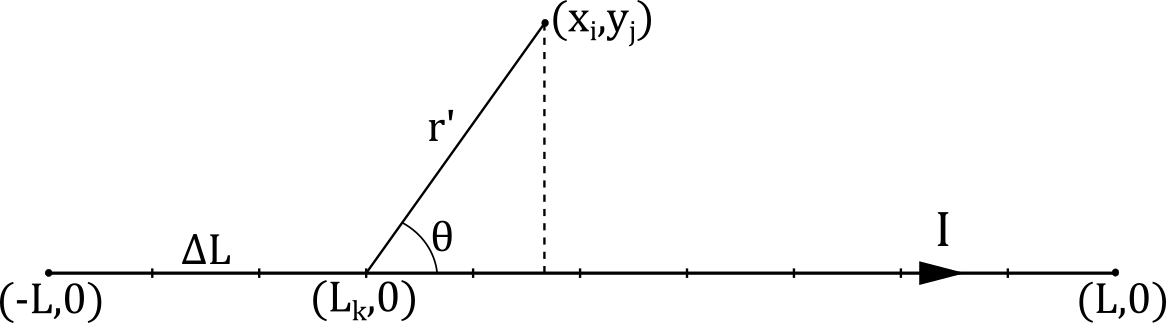

Systemet vi skal se på består av en endelig ledning som går fra $(-L,0)$ til $(L,0)$ der strømmen $I$ har retning mot høyre som vist på figuren. Fra Biot-Savarts lov har vi at magnetfeltet fra en slik ledning er gitt ved
\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0I}{4 \pi} \int_{\textit{C}}\frac{\text{d}\vec{l} \times \vec{r}'}{r'^3} \text{,}
\end{equation}
der $\vec{r}':=\vec{r}-\vec{l}$ er en vektor fra et punkt $\vec{l}$ på ledningen til $\vec{r} = (x,y)$. Integralet går over hele ledningen. 

Vi kan skrive ut kryssproduktet som $\text{d}\vec{l}\times\vec{r}' = |\text{d}\vec{l}||\vec{r}'|\sin\theta$, og vi ser fra figuren at $\sin\theta = \frac{y}{|\vec{r}'|}$. I tillegg ligger både $\vec{r'}$ og $\text{d}\vec{l}$ i xy-planet, så magnetfeltet er rettet langs z-aksen. Ved å sette inn alt dette i Biot-Savarts lov, finner vi at styrken på magnetfeltet er gitt ved
\begin{equation}
    B(x,y) = \frac{\mu_0I}{4 \pi} \int_{-L}^{L}\frac{\text{d}x\, y}{|r'|^3}.
\end{equation}

Vi skal nå utføre dette integralet numerisk, ved å skrive det om til en diskret sum over punkter på ledningen. Generellt kan vi dele inn ledningen i $N$ punkter (10 på figuren i og med at vi ikke teller høyre endepunkt) med innbyrdes avstand $\Delta L$. Et punkt på ledningen har da koordinat $(L_k, 0)$, der $L_k \in \{-L, -L+\Delta L, -L+2\Delta L, ... ,L-\Delta L\}$. Videre ser vi fra figuren at $|r'| = \sqrt{(L_k - x_i)^2 + y_j^2}$. Dermed kan integralet vårt skrives som
\begin{equation}
    B(x_i, y_j) = \frac{\mu_0I}{4 \pi} \sum_{k=1}^{N}\frac{\Delta L y_j}{((L_k-x_i)^2 +y_j^2))^{3/2}}
\end{equation}


## a)
Lag en funksjon create_wire som returnerer en array med $N$ punkter fra $-L$ til $L-\Delta L$.

In [2]:
import numpy as np
from scipy.constants import mu_0, pi
import matplotlib.pyplot as plt
from matplotlib import colors

L = 1
N = 100
D = 2
I = 1

In [3]:
def create_wire(L: float, N: int) -> np.ndarray:
    return np.linspace(-L, L, N)

def create_mesh_grid(D, N) -> list[np.ndarray]:
    x_axis = np.linspace(-D, D, N)
    y_axis = np.linspace(-D, D, N)
    return np.meshgrid(x_axis, y_axis)

## b)
Lag en funksjon calc_magneticfield som regner ut det magnetiske feltet for et meshgrid (xi, yj). Denne burde også ha ledningen du laget i a) som input. Magnetfeltet regnes ut ved å utføre den diskrete summen som ble utledet i introduksjonen. 

Tips: Ettersom vi deler på null når $x_i = L_k$ og $y_j = 0$, vil det oppstå numeriske singulariteter langs ledningen. Dette må løses på et fornuftig vis. 

In [4]:
def calc_magneticfield(I: float, meshgrid: list[np.ndarray], wire: np.ndarray) -> np.ndarray:
    x_coor, y_coor = meshgrid[0], meshgrid[1]
    magnetic_field = np.zeros_like(x_coor)

    for l in wire:
        magnetic_field += y_coor / ((l - x_coor)**2 + y_coor**2)**(3/2) 

    return magnetic_field

In [5]:
mesh = create_mesh_grid(D, N)
wire = create_wire(L, N)
mag_field = calc_magneticfield(1, mesh, wire)

## c) 
Fremstill resultatene i et heatplot. Dere kan f.eks velge $L=1$ og plotte for et område $x,y \in (-2,2)$. Magnetfeltet burde normaliseres (plottes i enhet $\mu_0I/4\pi$).

In [6]:
def plot_heat_map(field: np.ndarray, xlabel: str = "x", ylabel: str = "y", title: str = "B") -> None:
    plt.imshow(abs(field), cmap="hot", norm="symlog")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.colorbar()
    plt.show()

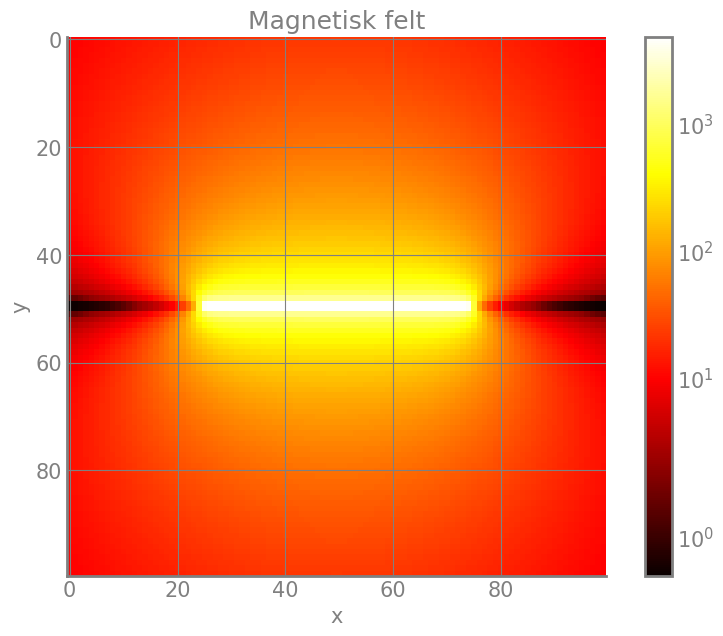

In [7]:
plot_heat_map(mag_field, "x", "y", "Magnetisk felt")

### Ekstraoppgave: Ledning vinkelrett på planet

En annen kjent konfigurasjon er en uendelig lang og uendelig tynn ledning orientert vinkelrett på planet med konstant strøm, $I$. Styrken på magnetfeltet vil da være trivielt være $|\vec{B}(\vec{r})| = \frac{\mu_0I}{4 \pi r^2}$, utfordringen med en numerisk formulering av denne situasjonen ligger i å beregne *retningen* magnetfeltet går i. 

$\textbf{a)}$ Plot magnetfeltet rundt en uendelig lang og uendelig tynn strømførende leder som står vinkelrett på planet i origo med konstant strøm, $I$, retning ut av planet.

In [32]:
def create_magnetic_field(I: float, mesh: list[np.ndarray], I_pos: tuple[float, float]) -> np.ndarray:
    # (x, y) -> (y, x)
    x_coor, y_coor = mesh
    r = np.sqrt((x_coor - I_pos[0])**2 + (y_coor - I_pos[1])**2) 
    field_x = -(y_coor - I_pos[1])*I/r**2
    field_y = (x_coor - I_pos[0])*I/r**2
    return np.array([field_x, field_y])

def length(field: np.ndarray) -> np.ndarray:
    x_components, y_components = field
    return np.sqrt(x_components**2 + y_components**2)

def scale(field: np.ndarray) -> np.ndarray:
    return field / np.max(np.abs(field),axis=0)

def plot_quiver(mesh: list[np.ndarray], field: np.ndarray):
    color = np.log(length(field))
    plt.quiver(*mesh, *(field / length(field)), color)
    plt.show()

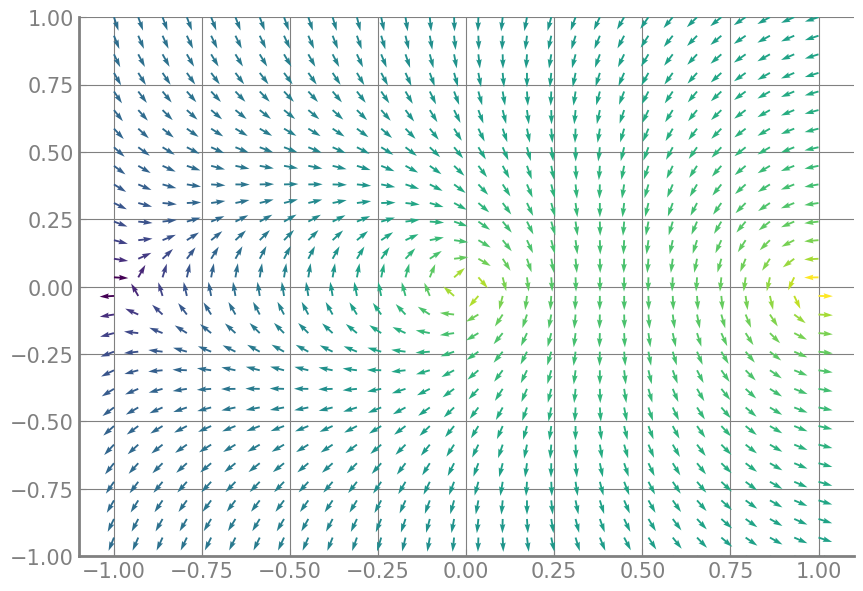

In [33]:
mesh = create_mesh_grid(1, 30)
magnetic_field_1 = create_magnetic_field(-1, mesh, (0, 0))
magnetic_field_2 = create_magnetic_field(2, mesh, (1, 0))
magnetic_field = magnetic_field_2 + magnetic_field_1

plot_quiver(mesh, magnetic_field)

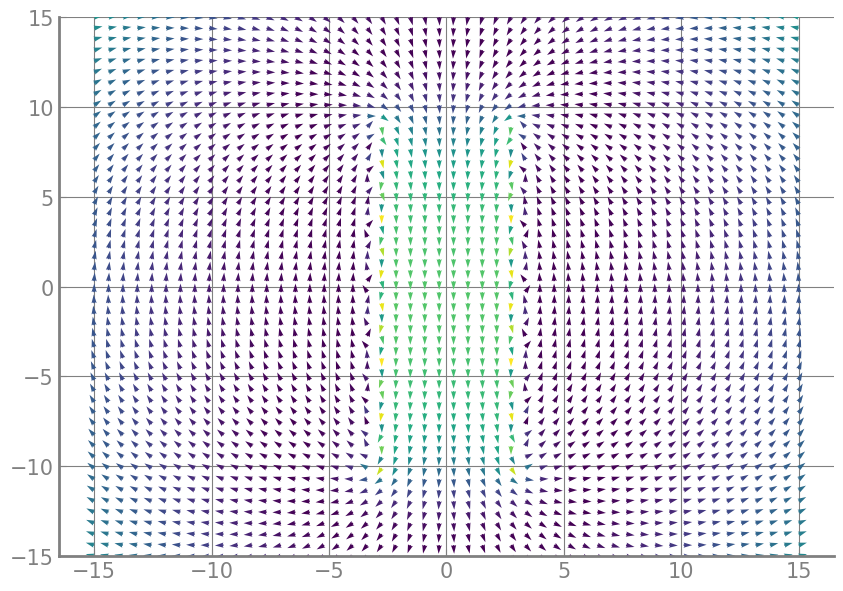

In [29]:
def create_coil(height: int, radius: int, mesh: list[np.ndarray]) -> np.ndarray:
    left_side = [(-radius,i) for i in range(-height, height, 1)]
    right_side = [(radius,i) for i in range(-height, height, 1)]
    total = left_side + right_side
    magnetic_field = sum([create_magnetic_field(1*np.sign(position[0]), mesh, position) for position in total])
    return magnetic_field

mesh = create_mesh_grid(15, 50)
coil = create_coil(10, 3, mesh)
plot_quiver(mesh, coil)

$\textbf{b)}$ Innfør flere ledninger i systemet, og se på hvordan magnetfeltet varier mht. posisjon og strømretning.